# Disney Plus Movies and TV Shows.
 **Found in Kaggle(https://www.kaggle.com/datasets/unanimad/disney-plus-shows ).**

#### As a data scientist at Disney+, we have been given a dataset containing information on movies and shows available on the platform. The task is to analyze the data and answer the following questions:
- Which are the top 10 highest rated movies/shows on DisneyPlus?
- Which year had the most releases on DisneyPlus?
- What is the most common genre of movies/shows on DisneyPlus?
- Is there a correlation between the movie/show runtime and its IMDB rating?
- Can we predict the IMDB rating of a movie/show on DisneyPlus based on its genre, director, writer, and actors?


To answer these questions, we will need to perform data cleaning and exploratory data analysis (EDA) on the DisneyPlus dataset. We will also need to use statistical analysis and visualization techniques to identify patterns and trends in the data. Additionally, we'll need to apply machine learning techniques such as regression or classification to predict the IMDB rating of a movie/show on DisneyPlus based on its genre, director, writer, and actors. Finally, you will need to evaluate the performance of your model using appropriate metrics and cross-validation techniques.

The output of our analysis should be a report summarizing your findings and recommendations for improving the content and user experience on DisneyPlus.

### Target:
Our target variable is the IMDB rating columns in the disney_plus dataframe.
The goal will be predict the **IMDB rating** for a movie or TV show based on its **genre**, **director**, **writer** and **actors**.

 Therefore, **IMDB rating** will be the dependent variable or target variable, while **genre, director, writer**, and **actors** will be independent variables or features.
 

In [1]:
file= 'disney_plus_shows.csv'

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.svm import SVR
df = pd.read_csv(file)
df=df.dropna()

**We Now take a look of every column on our target variales:**

In [3]:
df.columns

Index(['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at',
       'added_at', 'runtime', 'genre', 'director', 'writer', 'actors',
       'language', 'country', 'awards', 'metascore', 'imdb_rating',
       'imdb_votes'],
      dtype='object')

In [4]:
df.dtypes

imdb_id         object
title           object
plot            object
type            object
rated           object
year            object
released_at     object
added_at        object
runtime         object
genre           object
director        object
writer          object
actors          object
language        object
country         object
awards          object
metascore      float64
imdb_rating    float64
imdb_votes      object
dtype: object

We will need to change the *'runtime'*, the *'year'* and the *'imdb_votes'* type to **integer**, the *'released_at'* and *'added_at'* o datetime and we will need to analyze the object columns such as *'genre', 'director', 'writer'* and *'actors'* on a different dataframe with the only value the object and the count of it.

In [5]:
import datetime as dt

In [6]:
#Runtime columns to integer
df['runtime'] = pd.to_timedelta(df['runtime'].str.replace(r'\D', '') + ' min')
df['runtime'] = df['runtime'].dt.total_seconds() / 60
df['runtime']= df['runtime'].astype(int)

/var/folders/01/3t8cj2yd1rlgn7lfk03yjjdh0000gn/T/ipykernel_67748/1908458251.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['runtime'] = pd.to_timedelta(df['runtime'].str.replace(r'\D', '') + ' min')


In [7]:
#imdb_votes to integer
df['imdb_votes'] = df['imdb_votes'].str.replace(',', '')
df['imdb_votes'] = df['imdb_votes'].astype(int)
#year to integer
df['year']= df.year.astype(int)

In [8]:
#released_at to datetime
df['released_at'] = pd.to_datetime(df['released_at'])
#added_at to datetime
df['added_at'] = pd.to_datetime(df['added_at'])

Now in order to generate new dataframes to analize different object columns, we will need to get the columns to analize and the movie_id column to get order between values. We will need to:
- Create an empty list of the column to analize.
- Loop through each row in the original DataFrame.
- Split the list of actors by comma and add each individual value to the list.
- Create a new DataFrame using the list of individual values.

**Actors:**

In [9]:
# Create an empty list to store all individual actors
all_actors = []

# Loop through each row in the original DataFrame
for row in df.itertuples():
    # Split the list of actors by comma and add each individual actor to the list
    for actor in row.actors.split(', '):
        all_actors.append((row.Index, actor))

# Create a new DataFrame using the list of individual actors
df_actors = pd.DataFrame(all_actors, columns=['title', 'actor'])

In [10]:
actor_count = df_actors['actor'].value_counts()
actor_count.head(10)
# Top 10 actors who appear the most

Tim Allen            9
Robert Downey Jr.    7
Tom Hanks            7
Chris Hemsworth      6
Chris Evans          6
Jim Cummings         6
Natalie Portman      5
Johnny Depp          5
Mark Hamill          5
Carrie Fisher        5
Name: actor, dtype: int64

**Genres:**

In [11]:
# Create an empty list of genres
all_genres = []

for row in df.itertuples():
    # Split the list of actors by comma and add each individual genre to the list
    for genre in row.genre.split(', '):
        all_genres.append((row.Index, genre))

# Create a new DataFrame using the list of individual genres
df_genres = pd.DataFrame(all_genres, columns=['title', 'genre'])

genre_count = df_genres['genre'].value_counts()
genre_count.head(10)
# Top 10 genres who appear the most

Family       188
Adventure    158
Comedy       138
Fantasy      103
Animation     90
Drama         58
Action        57
Sci-Fi        53
Musical       52
Romance       41
Name: genre, dtype: int64

**Directors:**

In [12]:
# Create an empty list of directors
all_directors = []

for row in df.itertuples():
    # Split the list of directors by comma and add each individual director to the list
    for director in row.director.split(', '):
        all_directors.append((row.Index, director))

# Create a new DataFrame using the list of individual directors
df_directors = pd.DataFrame(all_directors, columns=['title', 'director'])

director_count = df_directors['director'].value_counts()
director_count.head(10)
# Top 10 directors who appear the most

Hamilton Luske         10
Clyde Geronimi         10
Wilfred Jackson         9
Wolfgang Reitherman     8
Ron Clements            7
John Musker             7
Jack Kinney             6
Robert Stevenson        6
David Hand              6
John Lasseter           5
Name: director, dtype: int64

**Writers:**

In [13]:
# We have to remove the parenthesis and all the symbols
df['writer'] = df['writer'].str.replace(r"\([^()]*\)", "")
# Create an empty list of writers
all_writers = []

for row in df.itertuples():
# Split the list of writers by comma and add each individual writer to the list
    for writer in row.writer.split(', '):
        all_writers.append((row.Index, writer))

# Create a new DataFrame using the list of individual writers
df_writers = pd.DataFrame(all_writers, columns=['title', 'writer'])

writer_count = df_writers['writer'].value_counts()
writer_count.head(10)
# Top 10 directors who appear the most

/var/folders/01/3t8cj2yd1rlgn7lfk03yjjdh0000gn/T/ipykernel_67748/1156669627.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['writer'] = df['writer'].str.replace(r"\([^()]*\)", "")


Jack Kirby          17
Andrew Stanton      17
Stan Lee            13
Ted Sears           10
Terry Rossio        10
Ted Elliott         10
George Lucas         9
Ralph Wright         9
Larry Lieber         9
Burny Mattinson      9
Name: writer, dtype: int64

We are going to visualize the numeric columns with histograms

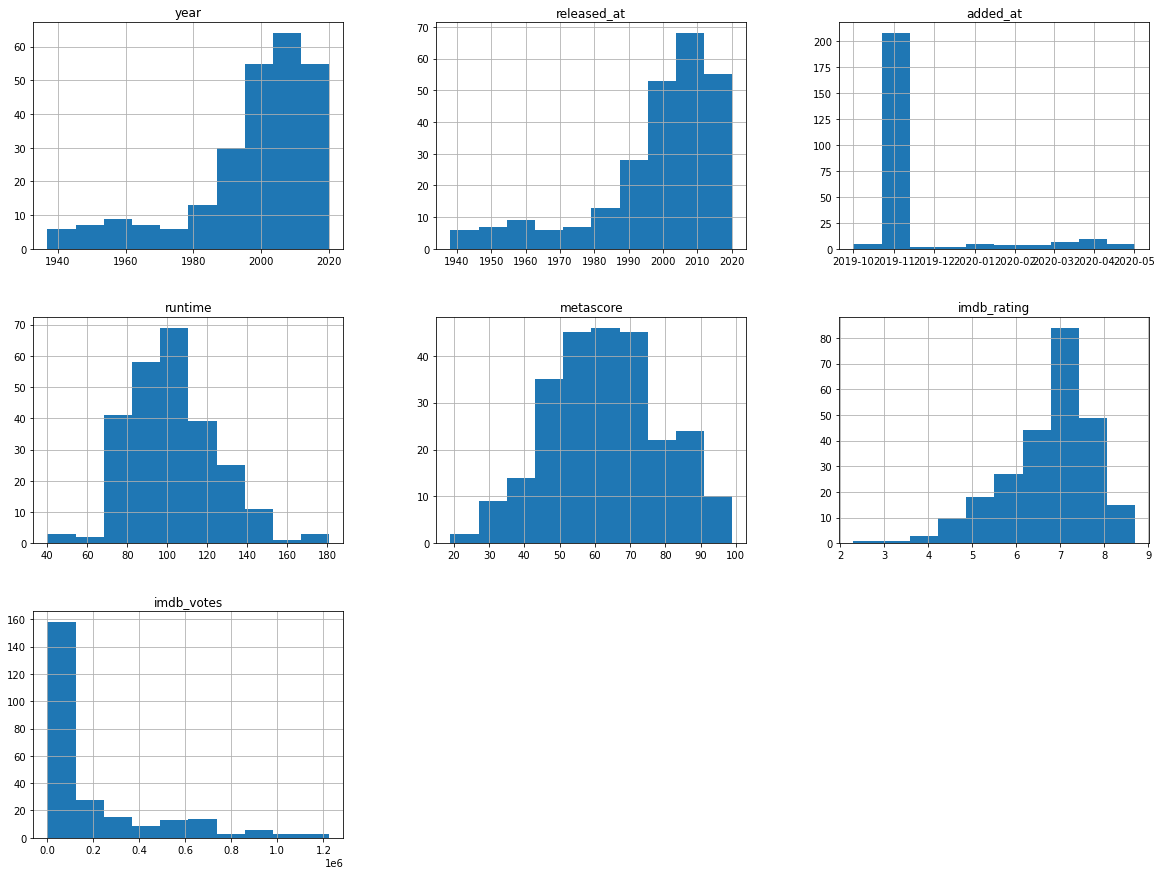

In [14]:
df.hist(bins=10, figsize=(20, 15))
plt.show()

###### After take a quick look into the data, we are ready to solve the questions asked before:

###  Which are the top 10 highest rated movies/shows on DisneyPlus?
To find the top 10 highest rated movies, I decided to use the ***nlargest*** atribute using the DataFrame as a Object and select the 10 highest.


                                              title  imdb_rating
719  Star Wars: Episode V - The Empire Strikes Back          8.7
712              Star Wars: Episode IV - A New Hope          8.6
821                                   The Lion King          8.5
128                                            Coco          8.4
486                               Avengers: Endgame          8.4
956                                          WALL·E          8.4
57                                 Before the Flood          8.3
715      Star Wars: Episode VI - Return of the Jedi          8.3
923                                       Toy Story          8.3
925                                     Toy Story 3          8.3


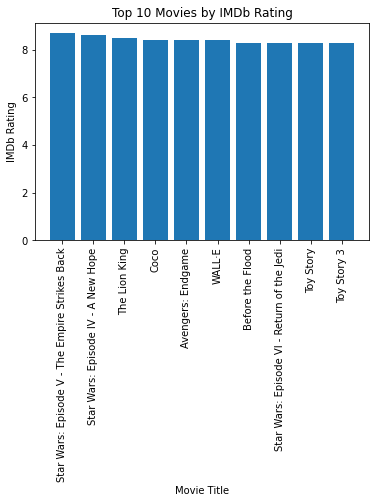

In [15]:
#  Which are the top 10 highest rated movies/shows on DisneyPlus?
top_10_imdb = df.nlargest(10, 'imdb_rating')
print(top_10_imdb[['title', 'imdb_rating']])
# bar plot
plt.bar(top_10_imdb['title'], top_10_imdb['imdb_rating'])

# set the x-axis label and rotate the x-tick labels for better visibility
plt.xlabel('Movie Title')
plt.xticks(rotation=90)

# set the y-axis label
plt.ylabel('IMDb Rating')

# set the title
plt.title('Top 10 Movies by IMDb Rating')
# display the plot
plt.show()


On this plot we can see the ratings that all of these movies had, we can see some movies for Star Wars, other made by pixar such as Toy Story and Wall-E.

### Which year had the most releases on DisneyPlus?

For this question we had to change the type of the data to string just to move between values easily and we decided to place a red line on the X-axis on the year with most releases. for the big amount of years I decided to use a line plot with all the years and a bar plot with the last 40 years split on two (20 years each). Where the technology and the value increased exponentially.

The year with the most releases on DisneyPlus is: 2016


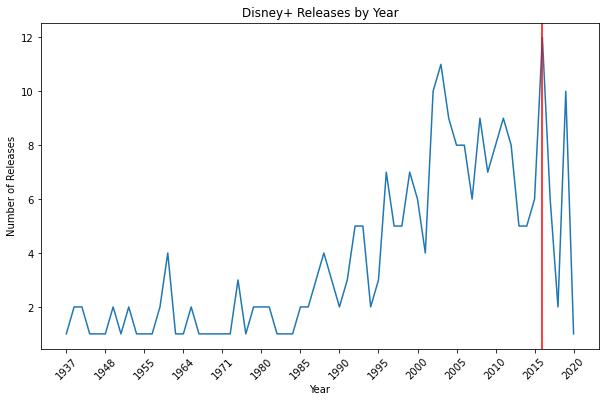

In [16]:
#'year' column to a string
df['year'] = df['year'].astype(str)

# Number of releases for each year
release_counts = df['year'].value_counts()

# Sort the counts by year
release_counts = release_counts.sort_index()
year_counts = df['year'].value_counts()
most_releases_year = year_counts.index[0]

print("The year with the most releases on DisneyPlus is:", most_releases_year)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(release_counts.index, release_counts.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases')
ax.set_title('Disney+ Releases by Year')

# Show only the last 10 years on the x-axis
num_years = 10
last_years = release_counts.index[::5]
ax.set_xticks(last_years)
ax.set_xticklabels(last_years, rotation=45)

# Find the year with the most releases and draw a red line at its position
max_year = release_counts.idxmax()
plt.axvline(x=max_year, color='red')
plt.show()


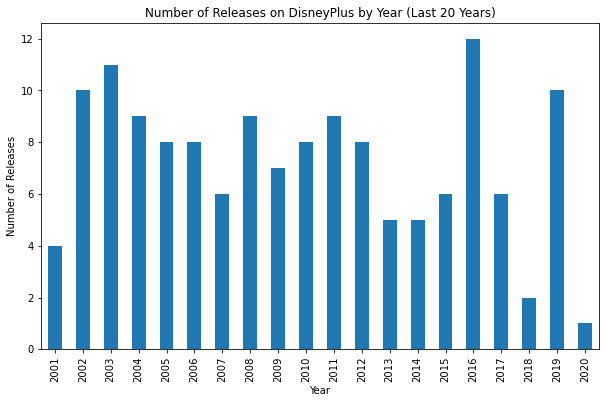

In [17]:
year_counts = df['year'].value_counts().sort_index()
last_10_years = year_counts.tail(20)
last_10_years.plot(kind='bar', figsize=(10,6))
plt.title('Number of Releases on DisneyPlus by Year (Last 20 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

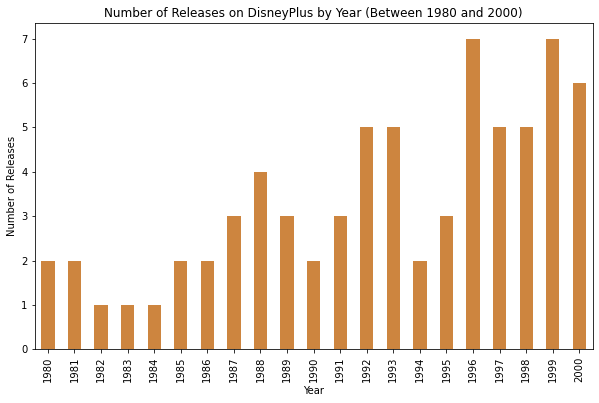

In [18]:
last_10_years = year_counts[-41:-20]
last_10_years.plot(kind='bar', color= 'peru',figsize=(10,6))
plt.title('Number of Releases on DisneyPlus by Year (Between 1980 and 2000)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

### What is the most common genre of movies/shows on DisneyPlus?
To solve that question I decided to make the ***Genre*** column a dummy DataFrame to separate the enres even if a single movie has more than one genre. Once I decided to make the dummy values for the Genre column, I created dummy values with every object columns.

I used different plots to visualize the data: 
- Using the dummy values to visualize all the values and the genres by the count of movies. This give a contectualized and complete visual of the data and how the genres are distribued.
- I used a bar chart rotated to visualize two kind of values, one for the most common genres on movies and the other one with the rest of the data.
- Finaly I used pie charts to show how distributed are these genres on eah other and I made other to recreate the distribution between the most common genres and the less common genres represented as **Other.** 

This will allow us a big visual how the genres are distributed between each other.


In [19]:
#dummy values for the object columns
genre_dummies= df['genre'].str.get_dummies(',')
actor_dummies= df['actors'].str.get_dummies(',')
director_dummies= df['director'].str.get_dummies(',')
writer_dummies= df['writer'].str.get_dummies(',')

The most 7 common genre on DisneyPlus is:
 Family       188
Adventure    158
Comedy       138
Fantasy      103
Animation     90
Drama         58
Action        57
Name: genre, dtype: int64


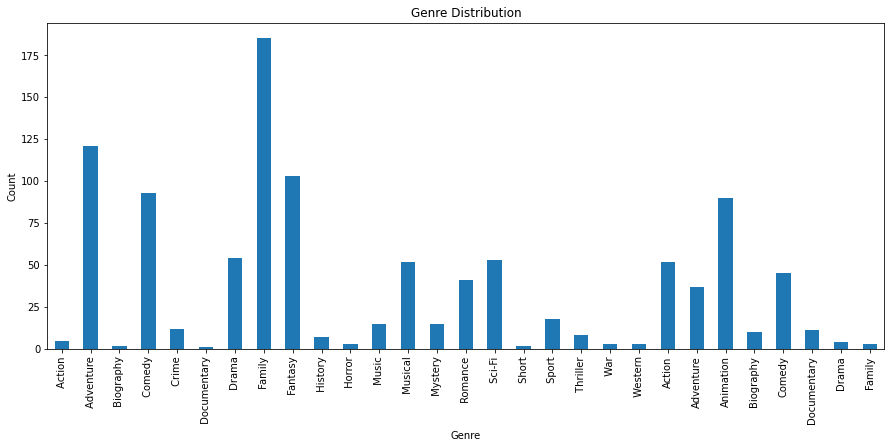

In [20]:
genre_counts = df['genre'].value_counts()

# Print the most 7 common genres
print("The most 7 common genre on DisneyPlus is:\n", genre_count.head(7))

# plot the dummy variables
genre_dummies.sum().plot.bar(figsize=(15, 6))
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

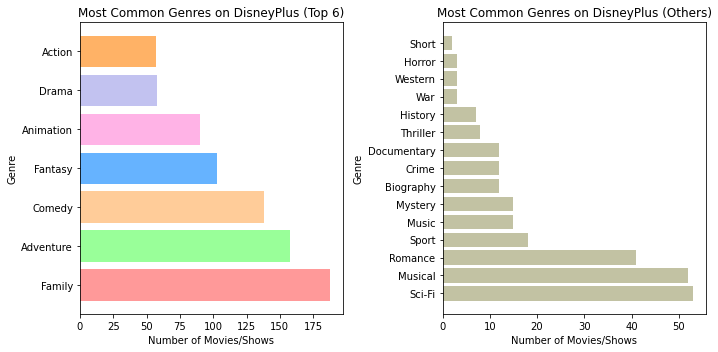

In [21]:

# Splitting the chart into two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
colors = ['#ff9999', '#99ff99', '#ffcc99', '#66b3ff','#ffb3e6', '#c2c2f0', '#ffb266']
# Plotting the first chart
axs[0].barh(genre_count.index[:7], genre_count.values[:7], color=colors)
axs[0].set_title('Most Common Genres on DisneyPlus (Top 6)')
axs[0].set_xlabel('Number of Movies/Shows')
axs[0].set_ylabel('Genre')
colors = ['#ff9999', '#99ff99', '#ffcc99', '#66b3ff','#ffb3e6', '#c2c2f0', '#ffb266']
# Plotting the second chart
axs[1].barh(genre_count.index[7:], genre_count.values[7:], color='#c2c2a3')
axs[1].set_title('Most Common Genres on DisneyPlus (Others)')
axs[1].set_xlabel('Number of Movies/Shows')
axs[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()


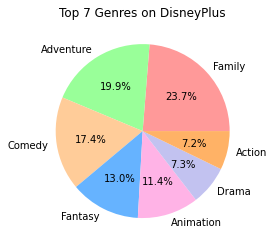

In [22]:
# Get the 7 most common genres
top_genres = genre_count.nlargest(7)

# Create the pie chart
plt.pie(top_genres.values, colors= colors, labels=top_genres.index, autopct='%1.1f%%')
# Title
plt.title('Top 7 Genres on DisneyPlus')
plt.show()

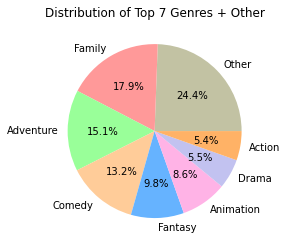

In [23]:
#Pie chart for others
top_genres = genre_count.nlargest(7).keys()
df_genres['genre_new'] = df_genres['genre'].apply(lambda x: x if x in top_genres else 'Other')
colors1= ['#c2c2a3','#ff9999', '#99ff99', '#ffcc99', '#66b3ff','#ffb3e6', '#c2c2f0', '#ffb266']
counts = df_genres['genre_new'].value_counts()
plt.pie(counts, labels=counts.index, colors= colors1,  autopct='%1.1f%%')
plt.title('Distribution of Top 7 Genres + Other')
plt.show()

# Is there a correlation between the movie/show runtime and its IMDB rating?

To solve the question we can make correlations between all columns, and the best way to look for correlations is creating a Heatmap, that allow us the hability not just to find the correlation between the movie/show and its IMDB rating, also it allow me to find any correlation between values. being 1.0 a high correlation and 0.0 a lower expectation.


Correlation between various features


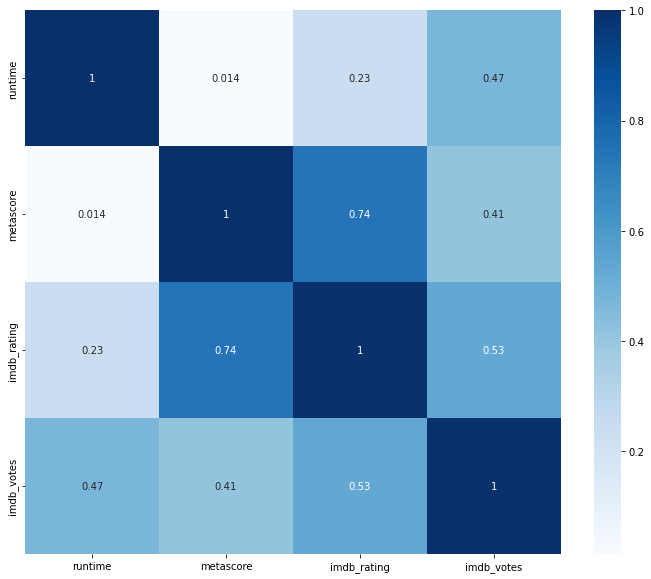

In [24]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

In [25]:
correlation = df['runtime'].corr(df['imdb_rating'])
print(correlation)

0.23492840711156165


We can conclude that the runtime has no correlation between the Imdb rating and we could find some correlation according to the heat map between the metascore and the Imdb rating, this suggests that there is little to no linear relationship between Imdb rating and the runtime, but it does not necessarily mean that there is no relationship at all. Further analysis and investigation may be necessary to fully understand the nature of the relationship between the variables.

In [26]:
df.head(2)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,1999-03-31,2019-11-12,97,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,283945
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,1996-11-27,2019-11-12,103,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith , John Hughes","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,97785


## Can we predict the IMDB rating of a movie/show on DisneyPlus based on its genre, director, writer, and actors?

And finally the last question. I wanted to predict the IMDB rating using the **SVM** (Support Vector Machine) model for this Machin Learning project, however, after analized it and make the modelin, I found a low performance on the model so I decided to use a Hyperparameter to find the best parameters to make the model. I used the Hyperparameter **GridSearch** and I found that the model **SVR** (Support Vector Regression), that gives the oportunity to use an Hyperplane in a High-Dimensional Space. However, the performance was not the expected.

###### Training creation with X & y values made with the target for X and the IMDB_ratings on y

In [27]:
# Merge director_dummies, writer_dummies, actor_dummies & genre_dummies by Title with df_ratings
df_ratings= df['imdb_rating']
# merge the dataframes
df_merged = pd.concat([df_ratings,director_dummies, writer_dummies, actor_dummies,genre_dummies], axis=1)

# split the data into X and y
X = df_merged.drop('imdb_rating', axis=1)
y = df_merged['imdb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# perform

#### Use of the model SVM (Support Vector Machine)

Root Mean Squared Error: 0.8396613720911362
MSE: 0.7050312197819695
R-squared: 0.24071882373745757


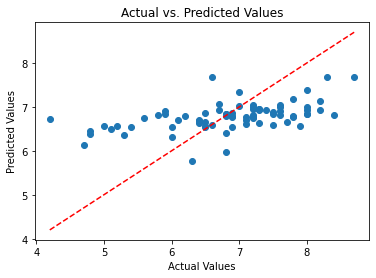

In [28]:
# Initialize the SVM model
svm = svm.SVR(kernel='linear', C=1.0, epsilon=0.1)

# Fitting the SVM model on the training data
svm.fit(X_train, y_train)

# Predictions on the testing data
y_pred = svm.predict(X_test)

# Root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


#### Hyperparameter GridSearch (SVR model used)

In [29]:
# define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.01, 0.1, 1, 10]
}

# create the SVR model
model = SVR(kernel='rbf')

# create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X, y)

# get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print( 'The best parameters for the model are: ',best_params)
print('The best score possible is: ' ,best_score)


The best parameters for the model are:  {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
The best score possible is:  -0.8138265990762662


- Now we are going to make the model with those parameters 

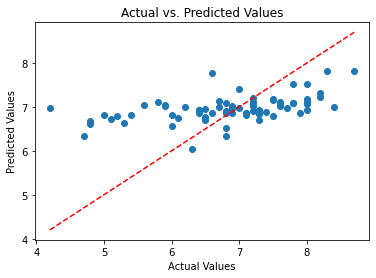

Root Mean Squared Error: 0.8580537841607551
MSE: 0.7362562965125917
R-squared: 0.20709107460565757


In [30]:


# Instantiate an SVR model with the optimal hyperparameters
model = SVR(C=10, epsilon=0.01, gamma='scale')

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


import matplotlib.pyplot as plt

# Assuming your model is named `model` and your test data is named `X_test` and `y_test`
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)


With a high ***Root Mean Squared Error***, a high ***Mean Squared Error*** and a low ***R-squared*** showed on the model and the prediction, I confirm the low performance that my model can have a low accuracy. With the concern if the model can be used or not as a predictor of the IMDB rating I created a dummy model based on the mean of the ratings with the purpose to compare the models and if the model was worse than the dummy model, we can confirm that the model is completely inaccurate and useless.

#### Dummy Model

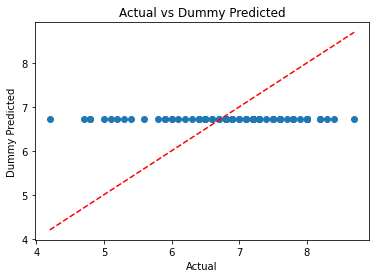

MSE: 0.9455817746846455
RMSE: 0.9724102913300772
R-squared: -0.018341347149151144


In [31]:
from sklearn.dummy import DummyRegressor

# Dummy regressor that always predicts the mean of the training target variable
dummy = DummyRegressor(strategy='mean')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dummy.fit(X_train, y_train)

# Predictions on the test data using the trained dummy regressor
y_pred_dummy = dummy.predict(X_test)

plt.scatter(y_test, y_pred_dummy)
plt.xlabel('Actual')
plt.ylabel('Dummy Predicted')
plt.title('Actual vs Dummy Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
y_pred_dummy

# evaluate the performance of the model on the testing set
mse = mean_squared_error(y_test, y_pred_dummy)
rmse = np.sqrt(mse)
r2 = dummy.score(X_test, y_test)
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R-squared: {}".format(r2))

The Dummy model showed a lower performance than the SVR model, however, both models have a low performance and we can conclude that with the data given, we cannot predict the IMDB ratings with the genre, the director, the writers and the actors.
